In [1]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#sns.set(font='SimHei', font_scale=2.5)
#plt.rcParams['axes.grid'] = False

import numpy as np

import pandas as pd
#pd.options.display.max_rows = 20

#import sklearn

#import itertools

#import logging
#logger = logging.getLogger()

#from IPython.display import SVG
from IPython.display import Image

Chapter 3: Finite Markov Decision Processes 
==========

MDP(Markov Decision Processes): actions influence not just immediate rewards, but also subsequential situations.

### 3.1 The Agent-Environment Interface

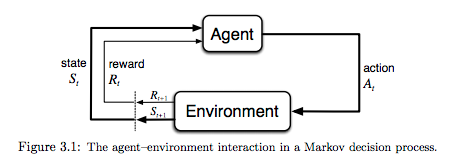

In [3]:
Image('./res/fig3_1.png')

*finite* MDP: the sets of states, actions and rewards all have a finite number of elements.

\begin{align}
    & p(s', r \mid s, a) \doteq \operatorname{Pr} \{ S_t = s', R_t = r \mid S_{t-1} = s, A_{t-1} = a \} \\
    & \displaystyle \sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}} p(s', r \mid s, a) = 1 \quad \text{, for all $s \in \mathcal{S}$, $a \in \mathcal{A}(s)$}
\end{align}


+ state-transition probabilities:

\begin{align*}
    p(s' \mid s, a) & \doteq \operatorname{Pr} \{ S_t = s' \mid S_{t-1} = s, A_{t-1} = a \} \\
                    & = \sum_{r \in \mathcal{R}} p(s', r \mid s, a)
\end{align*}

+ expected rewards for state-action paris:

\begin{align*}
    r(s, a) & \doteq \mathbb{E} \left [ R_t \mid S_{t-1} = s, A_{t-1} = a \right ] \\
            & = \sum_{r \in \mathcal{R}} \left ( r \sum_{s' \in \mathcal{S}} p(s', r \mid s, a) \right )
\end{align*}

+ expected rewards for state-action-next-state triples:

\begin{align*}
    r(s, a, s') & \doteq \mathbb{E} \left [ R_t \mid S_{t-1} = s, A_{t-1} = a, S_t = s' \right ] \\
            & = \sum_{r \in \mathcal{R}} r \frac{p(s', r \mid s, a)}{p(s' \mid s, a)}
\end{align*}

agent-environment boundary represents the limit of the agent's *absolute control*, not of its knowledge.

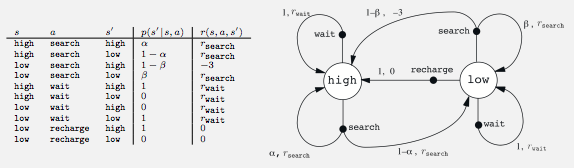

In [5]:
# Transition Graph
Image('./res/ex3_3.png')

##### Exercise 3.4

$r(S_t, a) \; \pi(a \mid S_t)$



### 3.2 Goals and Rewards

goal: to maximize the total amount of reward it receives.

In particular, the reward signal is not the place to impart to the agent prior knowledge about *how* to achieve what it to do.

### 3.3 Returns and Episodes

+ episodic tasks: $G_t \doteq R_{t+1} + R_{t+2} + R_{t+3} + \cdots + R_T$, $\quad G_t$ is *expected return*.
+ continuing tasks: $G_t \doteq R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdots = \displaystyle \sum_{k=0}^\infty \gamma^k R_{t+k+1} = R_{t+1} + \gamma G_{t+1}$    
  - $\gamma$ is called *discount rate*, and $0 \leq \gamma \leq 1$    
  - $G_T = 0$ often makes it easy to compute returns from reward sequences.
  
  
##### exercise 3.8

0 for escaping from the maze and -1 at all other times

##### exercise 3.10

$G_1 = \frac{7}{1 - r} = 70$

$G_0 = R_1 + 0.9 G_1 = 65$

##### exercise 3.11

\begin{align}
    G_t &= \sum_{k=0}^\infty r^k \\
        &= 1 + r \sum_{k=0}^\infty r^k \\
        &= 1 + r G_t \\
        &= \frac1{1 - r}
\end{align}

### 3.4 Unified Notation for Episodic and Continuing Tasks

$G_t \doteq \sum_{k=t+1}^T \gamma^{k-t-1} R_k$, including the possibility that $T = \infty$ or $\gamma = 1$.

### 3.5 Policies and Value Functions

+ value functions: estimate *how good* it is for the agent to be in a given state.
+ policy $\pi$: a mapping from states to probabilities of selecting each possible action.
+ The *value* of a state $s$ under a policy $\pi$, denoted $v_\pi(s)$, is the expected return when starting in $s$ and following $\pi$ thereafter:     
  $v_\pi(s) \doteq \mathbb{E}_\pi [ G_t \mid S_t = s ]$
  - $v_\pi$: state-value function for policy $\pi$
+ $q_\pi$: action-value function for policy $\pi$, $q_\pi(s, a) \doteq \mathbb{E}_\pi [ G_t \mid S_t = s, A_t = a]$

Bellman equation for $v_\pi$:

\begin{equation}
    v_\pi(s) \doteq \displaystyle \sum_a \pi(a \mid s) \sum_{s', r} p(s', r \mid s, a) \left [ r + \gamma v_\pi(s') \right ] \quad \text{, for all $s \in \mathcal{S}$}
\end{equation}

The value functions $v_\pi$ and $q_\pi$ can be estimated from experience, say Monte Carlo methods (average).

In [31]:
# Example 3.5
from scipy.signal import convolve2d

reward_matrix = np.zeros((5, 5))
# kernel
kernel = np.array([[0, 1, 0],
                   [1, 0, 1],
                   [0, 1, 0]])

iteration_nums = 100

for _ in range(iteration_nums):
    reward = convolve2d(reward_matrix, kernel, mode='same', boundary='fill', fillvalue=-1)
    reward /= 4.0
    # A -> A'
    reward[0, 1] = 10 + reward[-1, 1]
    # B -> B'
    reward[0, -2] = 5 + reward[2, -2]
    reward_matrix = reward
 
pd.DataFrame(reward_matrix)

0         1         2         3         4
0  2.253150  9.592586  4.524364  6.244556  1.271214
1  1.420013  3.970976  3.260312  2.897431  0.840299
2  0.455929  1.610993  1.648482  1.244556  0.192553
3 -0.207290  0.368589  0.478065  0.239763 -0.314645
4 -0.653676 -0.407414 -0.344568 -0.448925 -0.690892

##### exercise 3.12

(2.3 + 0.4 - 0.4 + 0.7) / 4 = 0.75


##### exercise 3.13


##### exercise 3.14

$\sum_{k=0}^\infty \gamma^k C = \frac{C}{1 - r}$ = constant offset

### 3.6 Optimal Policies and Optimal Value Functions

optimal policy: 

\begin{align}
    v_\ast(s) & \doteq \displaystyle \max_\pi v_\pi(s) \quad \text{ for all } s \in \mathcal{S} \\
              & = \max_a \sum_{s', r} p(s', r \mid s, a) \left [ r + \gamma v_\ast(s') \right ] \\
\end{align}

Any policy that is *greedy* with respect to the optimal evaluation function $v_\ast$ is an optimal policy.

optimal action-value function: 

\begin{align}
    q_\ast(s, a) & \doteq \max_\pi q_\pi(s, a) \quad \text{ for all $s \in \mathcal{S}$ and $a \in \mathcal{A}(s)$} \\
                 & = \mathbb{E} [ R_{t+1} + \gamma v_\ast(S_{t+1}) \mid S_t = s, A_t = a ] \\
                 & = \sum_{s', r} p(s', r \mid s, a) \left [ r + \gamma \max_{a'} q_\ast (s', a') \right ] \\
\end{align}


Explicitly solving the Bellman optimality equation relies on at least three assumptions that are rarely true in practice:

1. we accurately know the dynamics of the environment;
2. we have enough computational resources;
3. the Markov property.

### 3.7 Optimality and Approximation

extreme computational cost, memory => approximations

put more effort into learning to make good decisions for frequently encountered states, at the expense of less effort for infrequently encountered states.